# Load data

## Import modules

In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd

## Prepare the data

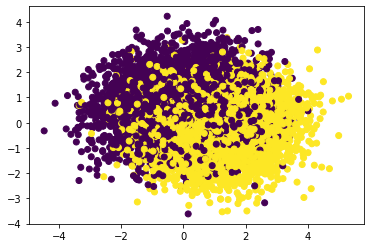

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib as plt

X, y = make_moons(n_samples = 10000, noise = 1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.pyplot.scatter(X[:, 0], X[:, 1], c=y)

## Helpers

In [ ]:
def precisionRate(cm, label):
    return cm.loc[label, label] / cm.loc[label].sum()

def specificityRate(cm, label):
    return cm.drop(index=label, columns=label).values.sum() / cm.drop(columns=label).values.sum()

In [ ]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(data, predictions):
  labels = data["target"].unique()
  cm = confusion_matrix(y_test, predictions, labels = labels)
  return pd.DataFrame(cm, columns = labels, index = labels)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

def show_errors(model, parameter, start_value, end_value, Xtrain, ytrain, Xtest, ytest):
  total_train_error = 0
  total_test_error = 0
  start_nb = start_value
  end_nb = end_value
  all_train_errors = np.array([float(i) for i in range(1, (end_nb-start_nb+1))])
  all_test_errors = np.array([float(i) for i in range(1, (end_nb-start_nb+1))])
  x = np.array([i for i in range(start_nb, end_nb)])
  for nb in range(start_nb, end_nb):
    current_model = model
    current_model.set_params(**{parameter: nb})
    current_model.fit(Xtrain, ytrain)

    train_error = 1-accuracy_score(ytrain, current_model.predict(Xtrain))
    total_train_error += train_error
    all_train_errors[nb - start_nb] = train_error

    test_error = 1-accuracy_score(ytest, current_model.predict(Xtest))
    total_test_error += test_error
    all_test_errors[nb - start_nb] = test_error

  plt.plot(x, all_train_errors, 'r')
  plt.plot(x, all_test_errors, 'b')
  plt.legend(['training error', 'test error'])
  plt.xlabel('value metaparameter')
  plt.ylabel('error')
  plt.show()

  print('Average train error: %s' % round((total_train_error / (end_nb-start_nb)), 2))
  print('Average test error: %s' % round((total_test_error / (end_nb-start_nb)), 2))
  print('The optimal metaparameter is %s for a test error of %s.' %(str(np.argmin(all_test_errors)+start_nb), str(np.min(all_test_errors))))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def get_predictions(train_data, train_labels, test_data, k):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(train_data, train_labels)
  return model.predict(test_data)

def get_error_rates_df(X_train, y_train, X_test, range=range(1, 10)):
  data = {}
  for k in range:
    test_predictions = get_predictions(X_train, y_train, X_test, k)
    train_predictions = get_predictions(X_train , y_train, X_train, k)
    data[k] = {
        "test": 1 - accuracy_score(y_test, test_predictions),
        "training": 1 - accuracy_score(y_train, train_predictions)
    }
  return pd.DataFrame.from_dict(data, orient = 'index')

def show_error_rates(error_df, title, xlabel, ylabel):
  plot = error_df.plot(
      kind="line",
      title=title
  )
  plot.set_xlabel(xlabel)
  plot.set_ylabel(ylabel)



# Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(X = X_train, y = y_train)
bayes_y_predictions = bayes_model.predict(X_test)
bayes_cm_df = get_confusion_matrix(moons_df, bayes_y_predictions)

print(f"Predictions\n")
print(bayes_y_predictions)
print("\nConfusion matrix")
print(bayes_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, bayes_y_predictions)}")
print(f"Precision rate: {round(precisionRate(bayes_cm_df, 1), 2)}")
print(f"Specificity rate: {round(specificityRate(bayes_cm_df, 1), 2)}")

Predictions

[1 1 0 ... 0 1 0]

Confusion matrix
      1     0
1  1470   216
0   185  1429

Accuracy score: 0.8784848484848485
Precision rate: 0.87
Specificity rate: 0.87


# KNN

## Analysis

Predictions

[1 1 0 ... 0 1 0]

Confusion matrix
      1     0
1  1470   216
0   185  1429

Accuracy score: 0.7155
Precision rate: 0.71
Specificity rate: 0.72



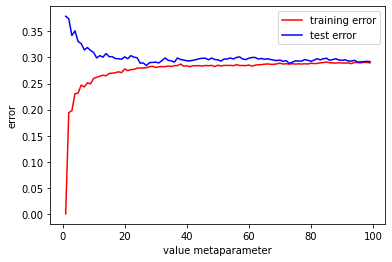

Average train error: 0.28
Average test error: 0.3
The optimal metaparameter is 27 for a test error of 0.2845.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

kneighbors_model = KNeighborsClassifier(n_neighbors = 27)
kneighbors_model.fit(X_train, y_train)
kneighbors_y_predictions = kneighbors_model.predict(X_test)
kneighbors_cm_df = get_confusion_matrix(moons_df, kneighbors_y_predictions)

print(f"Predictions\n")
print(bayes_y_predictions)
print("\nConfusion matrix")
print(bayes_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, kneighbors_y_predictions)}")
print(f"Precision rate: {round(precisionRate(kneighbors_cm_df, 1), 2)}")
print(f"Specificity rate: {round(specificityRate(kneighbors_cm_df, 1), 2)}\n")

show_errors(
    kneighbors_model,
    "n_neighbors",
    1,
    100,
    X_train,
    y_train,
    X_test,
    y_test
)

## Optimized Hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters_grid = {'n_neighbors': [20, 25, 30]}

kneighbors_model = KNeighborsClassifier()
optimized_kneighbors = GridSearchCV(kneighbors_model, parameters_grid, cv = 5)
optimized_kneighbors.fit(X_train, y_train)

print(optimized_kneighbors.best_params_)

{'n_neighbors': 30}


## Precision rate and specifity rate (test data set)


In [ ]:
def get_cm_df(y_true, y_pred, labels):
  cm = confusion_matrix(y_true, y_pred, labels = labels)
  return pd.DataFrame(cm, columns = labels, index = labels)

In [ ]:
def get_knn_model_stats_for_tests(range, label):
  data = {}
  for k in range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = get_cm_df(y_test, predictions, labels)
    data[k] = { 
      "specificity": specificityRate(cm, label), 
      "precision": precisionRate(cm, label)
    }
  return data

In [ ]:
data_1 = get_knn_model_stats_for_tests(range(5, 100), 1)
data_0 = get_knn_model_stats_for_tests(range(5, 100), 0)

data_1_df = pd.DataFrame.from_dict(data_1, orient = 'index')
data_0_df = pd.DataFrame.from_dict(data_0, orient = 'index')

print("Target 0\n--------")
print(f"max(precision) = {data_0_df['precision'].idxmax()}")
print(f"max(specificity) = {data_0_df['specificity'].idxmax()}\n")

print("Target 1\n--------")
print(f"max(precision) = {data_1_df['precision'].idxmax()}")
print(f"max(specificity) = {data_1_df['specificity'].idxmax()}")

pd.DataFrame.from_dict(data_1, orient = "index").plot(title="Target of 1", figsize=(20, 10))
pd.DataFrame.from_dict(data_0, orient = "index").plot(title="Target of 0", figsize=(20, 10))

## Precision rate and specifity rate (train data set)


In [ ]:
def precisionRate(cm, label):
    return cm.loc[label, label] / cm.loc[label].sum()

def specificityRate(cm, label):
    return cm.drop(index=label, columns=label).values.sum() / cm.drop(columns=label).values.sum()

In [ ]:
def get_cm_df(y_true, y_pred, labels):
  cm = confusion_matrix(y_true, y_pred, labels = labels)
  return pd.DataFrame(cm, columns = labels, index = labels)

In [ ]:
def get_knn_model_stats_for_training(range, label):
  data = {}
  for k in range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    cm = get_cm_df(y_train, predictions, labels)
    data[k] = { 
      "specificity": specificityRate(cm, label), 
      "precision": precisionRate(cm, label)
    }
  return data

In [ ]:
data_1 = get_knn_model_stats_for_training(range(5, 100), 1)
data_0 = get_knn_model_stats_for_training(range(5, 100), 0)

data_1_df = pd.DataFrame.from_dict(data_1, orient = 'index')
data_0_df = pd.DataFrame.from_dict(data_0, orient = 'index')

print("Target 0\n--------")
print(f"max(precision) = {data_0_df['precision'].idxmax()}")
print(f"max(specificity) = {data_0_df['specificity'].idxmax()}\n")

print("Target 1\n--------")
print(f"max(precision) = {data_1_df['precision'].idxmax()}")
print(f"max(specificity) = {data_1_df['specificity'].idxmax()}")

pd.DataFrame.from_dict(data_1, orient = "index").plot(title="Target of 1", figsize=(20, 10))
pd.DataFrame.from_dict(data_0, orient = "index").plot(title="Target of 0", figsize=(20, 10))

# Decision tree

## Analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot

decision_tree_model = DecisionTreeClassifier(
    max_depth = 6,
    max_leaf_nodes = 47,
    random_state = 42
)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_predictions = decision_tree_model.predict(X_test)
decision_tree_cm_df = get_confusion_matrix(moons_df, decision_tree_y_predictions)

print(f"Predictions\n")
print(decision_tree_y_predictions)
print("\nConfusion matrix")
print(decision_tree_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, decision_tree_y_predictions)}")
print(f"Precision rate: {round(precisionRate(decision_tree_cm_df, 1), 2)}")
print(f"Specificity rate: {round(specificityRate(decision_tree_cm_df, 1), 2)}\n")

tree.export_graphviz(decision_tree_model, out_file='/content/tree.dot')  
(graph,) = pydot.graph_from_dot_file("/content/tree.dot")
graph.write_png("/content/tree.png")


Predictions

[1 1 0 ... 0 0 1]

Confusion matrix
     0    1
0  725  288
1  309  678

Accuracy score: 0.7015
Precision rate: 0.69
Specificity rate: 0.7



### Max depth error
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

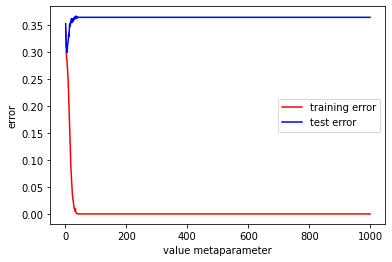

Average train error: 0.0
Average test error: 0.36
The optimal metaparameter is 6 for a test error of 0.2995.


In [ ]:
show_errors(
    decision_tree_model,
    "max_depth",
    1,
    1000,
    X_train,
    y_train,
    X_test,
    y_test
)

### Max leaf nodes

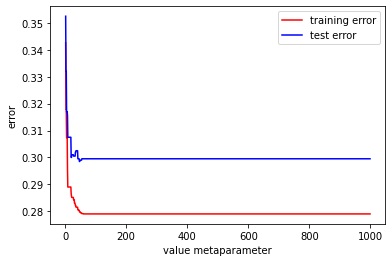

Average train error: 0.28
Average test error: 0.3
The optimal metaparameter is 47 for a test error of 0.2985.


In [ ]:
show_errors(
    decision_tree_model,
    "max_leaf_nodes",
    2,
    1000,
    X_train,
    y_train,
    X_test,
    y_test
)

### Min samples split
The minimum number of samples required to split an internal node

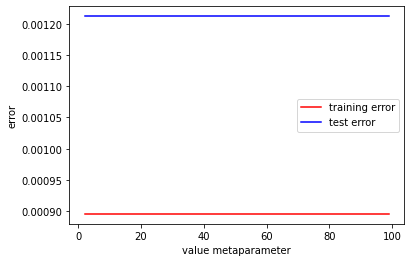

Average train error: 0.0
Average test error: 0.0
The optimal metaparameter is 2 for a test error of 0.00121212121212122.


In [ ]:
show_errors(
    decision_tree_model,
    "min_samples_split",
    2,
    100,
    X_train,
    y_train,
    X_test,
    y_test
)

### Min samples leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

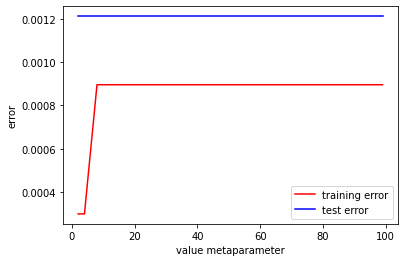

Average train error: 0.0
Average test error: 0.0
The optimal metaparameter is 2 for a test error of 0.00121212121212122.


In [ ]:
show_errors(
    decision_tree_model,
    "min_samples_leaf",
    2,
    100,
    X_train,
    y_train,
    X_test,
    y_test
)

## Optimized Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters_grid = { 
    'min_samples_split': [2, 10, 20,],
    'max_leaf_nodes': [10, 25]
}

tree_model = DecisionTreeClassifier(max_depth=1)
optimized_tree_model = GridSearchCV(tree_model, parameters_grid, cv = 5)
optimized_tree_model.fit(X_train, y_train)
tree_model_predictions = optimized_tree_model.predict(X_test)

print(f"Validation score: {optimized_tree_model.best_score_}")
print(f"Best parameters: {optimized_tree_model.best_params_}")
print(f"Accuracy score: {accuracy_score(y_test, tree_model_predictions)}")

Validation score: 0.654625
Best parameters: {'max_leaf_nodes': 10, 'min_samples_split': 2}
Accuracy score: 0.6475


# Random forest

## Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(
    n_estimators = 2,
    random_state = 42,
    max_depth = 7,
    min_samples_split = 2,
    min_samples_leaf = 2,
)
forest_model.fit(X_train, y_train)
forest_model_y_predictions = forest_model.predict(X_test)
forest_model_cm_df = get_confusion_matrix(moons_df, forest_model_y_predictions)

print(f"Predictions\n")
print(forest_model_y_predictions)
print("\nConfusion matrix")
print(forest_model_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, forest_model_y_predictions)}")
print(f"Precision rate: {round(precisionRate(forest_model_cm_df, 1), 2)}")
print(f"Specificity rate: {round(specificityRate(forest_model_cm_df, 1), 2)}\n")

Predictions

[1 0 0 ... 0 1 1]

Confusion matrix
      1     0
1  1682     4
0     0  1614

Accuracy score: 0.9987878787878788
Precision rate: 1.0
Specificity rate: 1.0



### Number of trees in the forest

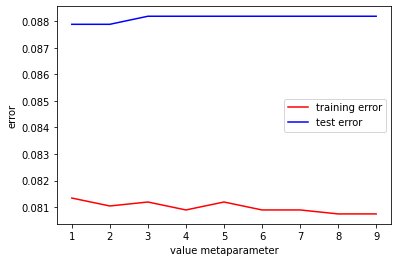

Average train error: 0.08
Average test error: 0.09
The optimal metaparameter is 1 for a test error of 0.08787878787878789.


In [ ]:
show_errors(
    forest_model,
    "n_estimators",
    1,
    10,
    X_train,
    y_train,
    X_test,
    y_test
)

### Max depth

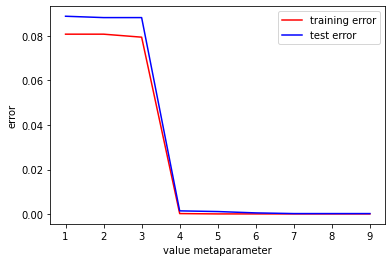

Average train error: 0.03
Average test error: 0.03
The optimal metaparameter is 7 for a test error of 0.00030303030303024947.


In [ ]:
show_errors(
    forest_model,
    "max_depth",
    1,
    10,
    X_train,
    y_train,
    X_test,
    y_test
)

### Min samples split


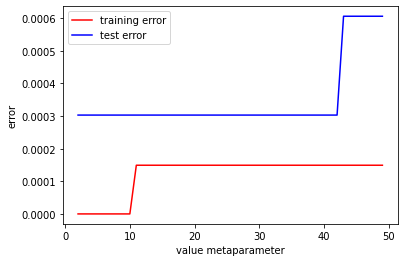

Average train error: 0.0
Average test error: 0.0
The optimal metaparameter is 2 for a test error of 0.00030303030303024947.


In [ ]:
show_errors(
    forest_model,
    "min_samples_split",
    2,
    50,
    X_train,
    y_train,
    X_test,
    y_test
)

### Min samples leaf

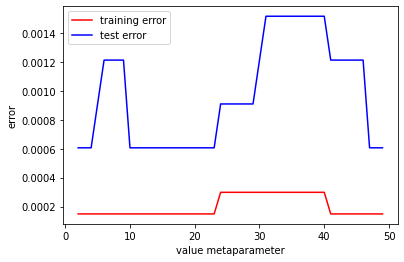

Average train error: 0.0
Average test error: 0.0
The optimal metaparameter is 2 for a test error of 0.00060606060606061.


In [ ]:
show_errors(
    forest_model,
    "min_samples_leaf",
    2,
    50,
    X_train,
    y_train,
    X_test,
    y_test
)

In [ ]:
forest_cm_df = get_confusion_matrix(heart_df, forest_model_y_predictions)
print(forest_cm_df)

## Optimized Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters_grid = { 
    'max_depth': [2, 3, 5,], 
    'min_samples_split': [32, 34, 40],
    'min_samples_leaf': [2, 10, 15],
}

forest_model = RandomForestClassifier(max_depth=1)
optimized_forest_model = GridSearchCV(forest_model, parameters_grid, cv = 10)
optimized_forest_model.fit(X_train, y_train)
forest_model_predictions = optimized_forest_model.predict(X_test)

print(f"Validation score: {optimized_forest_model.best_score_}")
print(f"Best parameters: {optimized_forest_model.best_params_}")
print(f"Accuracy score: {accuracy_score(y_test, forest_model_predictions)}")

Validation score: 0.9997014925373134
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 32}
Accuracy score: 0.9993939393939394


# Support Vector Machines
[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## Analysis

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(
  C=2,
  kernel="linear",
  random_state=42
)

svc_model.fit(X_train, y_train)
svc_model_y_predictions = svc_model.predict(X_test)
svc_model_cm_df = get_confusion_matrix(moons_df, svc_model_y_predictions)

print(f"Predictions\n")
print(svc_model_y_predictions)
print("\nConfusion matrix")
print(svc_model_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, svc_model_y_predictions)}")
print(f"Precision rate: {round(precisionRate(svc_model_cm_df, 1), 2)}")
print(f"Specificity rate: {round(specificityRate(svc_model_cm_df, 1), 2)}\n")

Predictions

[1 1 0 ... 0 0 0]

Confusion matrix
     0    1
0  912  101
1   97  890

Accuracy score: 0.901
Precision rate: 0.9
Specificity rate: 0.9



### Regularization parameter
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

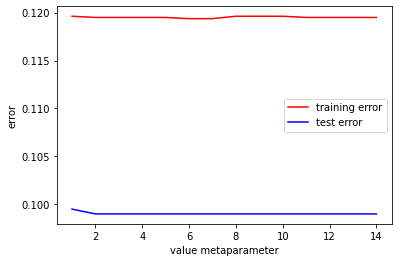

Average train error: 0.12
Average test error: 0.1
The optimal metaparameter is 2 for a test error of 0.09899999999999998.


In [ ]:
show_errors(
    svc_model,
    "C",
    1,
    15,
    X_train,
    y_train,
    X_test,
    y_test
)

## Optimized hyperparameters

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters_grid = { 
    'kernel': ['linear', 'poly', 'sigmoid',],
}

SVM_model = SVC(kernel="linear")
optimized_SVM_model = GridSearchCV(SVM_model, parameters_grid, cv = 10)
optimized_SVM_model.fit(X_train, y_train)
SVM_predictions = optimized_SVM_model.predict(X_test)

print(f"Validation score: {optimized_SVM_model.best_score_}")
print(f"Best parameters: {optimized_SVM_model.best_params_}")
print(f"Accuracy score: {accuracy_score(y_test, SVM_predictions)}")

Validation score: 0.9304999999999998
Best parameters: {'kernel': 'poly'}
Accuracy score: 0.939


# Neural network
[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(
    hidden_layer_sizes= (83,),
    activation = 'logistic',
    solver = 'adam'
)

neural_network.fit(X_train, y_train)
neural_network_predictions = neural_network.predict(X_test)
neural_network_cm_df = get_confusion_matrix(moons_df, neural_network_predictions)

print(f"Predictions\n")
print(neural_network_predictions)
print("\nConfusion matrix")
print(neural_network_cm_df)
print(f"\nAccuracy score: {accuracy_score(y_test, neural_network_predictions)}")
print(f"Precision rate: {round(precisionRate(neural_network_cm_df, 1), 2)}")
print(f"Specificity rate: {specificityRate(neural_network_cm_df, 1)}\n")

Predictions

[1 1 0 ... 0 0 1]

Confusion matrix
     0    1
0  711  302
1  260  727

Accuracy score: 0.719
Precision rate: 0.74
Specificity rate: 0.7322348094747683



### Hidden layer sizes
[How to choose the number of hidden layers and nodes in a feedforward neural network?](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

#### Helpers

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Disable the sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def layer_sizes_tuple(nlayers, layer_size):
  """Makes a tuple that represents a nn layer size.
  """
  hidden_layer_size = ()
  for layer in range(0, nlayers):
    hidden_layer_size += (layer_size,)
  return hidden_layer_size

def nn_pred(train_data, train_labels, test_data, layer_sizes):
  model = MLPClassifier(
    hidden_layer_sizes= layer_sizes,
    activation = 'logistic',
    solver = 'adam',
    random_state = 42
  )
  model.fit(train_data, train_labels)
  return model.predict(test_data)

def get_nn_error_rates_df(nlayers = 1, layer_size_range = range(1, 100)):
  """ Assuming that all the layers have the same size
  """
  data = {}
  for layer_size in layer_size_range:
    sizes = layer_sizes_tuple(nlayers, layer_size)
    test_predictions = nn_pred(X_train, y_train, X_test, sizes)
    train_predictions = nn_pred(X_train , y_train, X_train, sizes)
    data[layer_size] = {
        "test": 1 - accuracy_score(y_test, test_predictions),
        "training": 1 - accuracy_score(y_train, train_predictions) 
    }
  return pd.DataFrame.from_dict(data, orient = 'index')

def get_avg_error(df, column):
  return round(df[column].sum() / df[column].count(), 2)

#### Report

In [ ]:
from sklearn.metrics import accuracy_score

def nn_show_error_rates(nlayers, layer_size_range):
  nn_error_rates_df = get_nn_error_rates_df(nlayers, layer_size_range)
  plot = nn_error_rates_df.plot(title = f"Error rate for NN of {nlayers}")

  print(f"Error rate for NN of {nlayers}\n===")
  print(f"Average train error: {get_avg_error(nn_error_rates_df, 'training')}")
  print(f"Average test error: {get_avg_error(nn_error_rates_df, 'test')}")
  print(f"Optimal layer size for test ({nlayers} layers): {nn_error_rates_df['test'].idxmin()}")
  print(f"Lowest error for test: {round(nn_error_rates_df['test'].min(), 2)}")

nn_show_error_rates(1, range(1, 100))
nn_show_error_rates(2, range(1, 100))
nn_show_error_rates(3, range(1, 100))

Error rate for NN of 1
===
Average train error: 0.38
Average test error: 0.32
Optimal layer size for test (1 layers): 83
Lowest error for test: 0.17


## Optimized hyperparameters


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

parameters_grid = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam',],
}

neural_network = MLPClassifier(max_iter=500)
optimized_neural_network = GridSearchCV(neural_network, parameters_grid, cv = 10)
optimized_neural_network.fit(X_train, y_train)
neural_network_predictions = optimized_neural_network.predict(X_test)

print(f"Validation score: {optimized_neural_network.best_score_}")
print(f"Best parameters: {optimized_neural_network.best_params_}")
print(f"Accuracy score: {accuracy_score(y_test, neural_network_predictions)}")

Validation score: 0.8314285714285715
Best parameters: {'activation': 'logistic', 'solver': 'adam'}
Accuracy score: 0.71
